In [3]:
import numpy as np
import pandas as pd
import seaborn
data = seaborn.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


TASK


* How many passengers are described in the data set?

* How many distinct values are in who column?


* How many missing values do you fnd in each data column?

* Does the data contain passengers over 60 old? How many?


* What is the passenger age distribution? (Plot it.)

* What are the 3-quantiles of the passenger age distribution? List item








Number of passengers: 891
Distinct values in 'who' column: 3
Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Passengers over 60 years old: 22


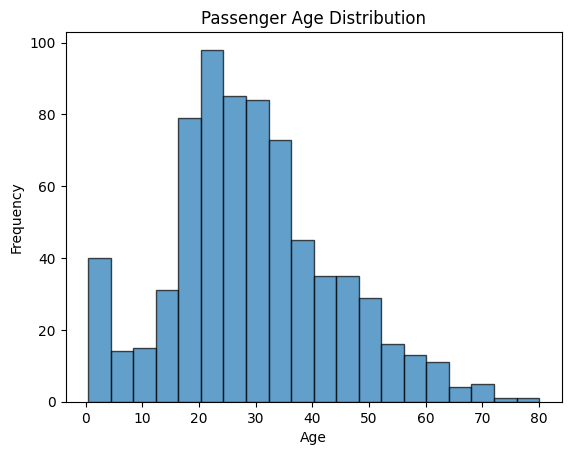

3-Quantiles of Passenger Age Distribution:
0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64


In [5]:


# 1. How many passengers are described in the data set?
num_passengers = len(data)
print(f"Number of passengers: {num_passengers}")

# 2. How many distinct values are in the 'who' column?
distinct_values = data['who'].nunique()
print(f"Distinct values in 'who' column: {distinct_values}")

# 3. How many missing values do you find in each data column?
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

# 4. Does the data contain passengers over 60 years old? How many?
passengers_over_60 = data[data['age'] > 60]
num_passengers_over_60 = len(passengers_over_60)
print(f"Passengers over 60 years old: {num_passengers_over_60}")

# 5. What is the passenger age distribution? (Plot it.)
data['age'].plot.hist(bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Passenger Age Distribution')
plt.show()

# 6. What are the 3-quantiles of the passenger age distribution?
quantiles = data['age'].quantile([0.25, 0.5, 0.75])
print("3-Quantiles of Passenger Age Distribution:")
print(quantiles)



*   How will you drop all passengers with no embarked data?
*   What is the average, minimum, and maximum fares paid by the passengers?


*   What are the proportions of passengers in different classes?

*  What is the female to male ratio in each travel class?
*   What fraction survived?





In [6]:
# Drop all passengers with no embarked data
data = data.dropna(subset=['embarked'])

# Calculate average, minimum, and maximum fares paid by passengers
average_fare = data['fare'].mean()
minimum_fare = data['fare'].min()
maximum_fare = data['fare'].max()
print(f"Average Fare: {average_fare}")
print(f"Minimum Fare: {minimum_fare}")
print(f"Maximum Fare: {maximum_fare}")

# Calculate proportions of passengers in different classes
class_proportions = data['class'].value_counts(normalize=True)
print("Proportions of Passengers in Different Classes:")
print(class_proportions)

# Calculate female to male ratio in each travel class
gender_ratio_by_class = data.groupby(['class', 'sex'])['sex'].count() / data.groupby('class')['sex'].count()
print("Female to Male Ratio in Each Travel Class:")
print(gender_ratio_by_class)

# Calculate the fraction of passengers who survived
survival_fraction = data['survived'].mean()
print(f"Fraction of Passengers who Survived: {survival_fraction}")


Average Fare: 32.09668087739032
Minimum Fare: 0.0
Maximum Fare: 512.3292
Proportions of Passengers in Different Classes:
Third     0.552306
First     0.240720
Second    0.206974
Name: class, dtype: float64
Female to Male Ratio in Each Travel Class:
class   sex   
First   female    0.429907
        male      0.570093
Second  female    0.413043
        male      0.586957
Third   female    0.293279
        male      0.706721
Name: sex, dtype: float64
Fraction of Passengers who Survived: 0.38245219347581555




*  Are the survival rates of male and female passengers different?
*  Are the survival rates of frst, second, and third class passengers different?

*   How can one print a table of survival rate dependencies on class and gender?
*    How can one print a table with number of survivors and average fare for each gender
and cabin?








In [9]:

# Are the survival rates of male and female passengers different?
gender_survival_rates = data.groupby('sex')['survived'].mean()
print("Survival Rates by Gender:")
print(gender_survival_rates)

# Are the survival rates of first, second, and third class passengers different?
class_survival_rates = data.groupby('class')['survived'].mean()
print("\nSurvival Rates by Class:")
print(class_survival_rates)

# Print a table of survival rate dependencies on class and gender
survival_table = data.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')
print("\nSurvival Rate Table by Class and Gender:")
print(survival_table)

# Print a table with the number of survivors and average fare for each gender and cabin
survivors_fare_table = data.groupby(['sibsp', 'sex'])[['survived', 'fare']].agg({'survived': 'sum', 'fare': 'mean'})
print("\nSurvivors and Average Fare Table by Cabin and Gender:")
print(survivors_fare_table)


Survival Rates by Gender:
sex
female    0.740385
male      0.188908
Name: survived, dtype: float64

Survival Rates by Class:
class
First     0.626168
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

Survival Rate Table by Class and Gender:
sex       female      male
class                     
First   0.967391  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447

Survivors and Average Fare Table by Cabin and Gender:
              survived       fare
sibsp sex                        
0     female       135  38.280331
      male          73  20.452848
1     female        80  49.401219
      male          32  38.740497
2     female        10  63.750315
      male           3  41.356667
3     female         4  67.018191
      male           0  73.068340
4     female         2  27.402083
      male           1  34.082292
5     female         0  46.900000
      male           0  46.900000
8     female         0  69.550000
      male           0  69.550000
